# Import Required Libraries

In [1]:
import os
import numpy as np
import pydicom
import gdcm
from matplotlib import pyplot, image
import cv2
from scipy import ndimage

# DICOM Files

In [2]:
directory = "/home/rodrigo/Projects/TCC/"
filename = "CT000115.png"
filepath = directory + filename

# Helper Functions 

In [3]:
def read_image_and_histogram(filepath):
    # Read grayscale DICOM image
    img = cv2.imread(filepath)
    # Calculate Histogram
    histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
    return img, histogram

In [4]:
def plot_image(image):
    imgplot = pyplot.imshow(img, cmap=pyplot.cm.bone)
    
def plot_histogram(histogram):
    # configure and draw the histogram figure
    pyplot.figure()
    pyplot.title("CT-Scan Histogram")
    pyplot.xlabel("grayscale value")
    pyplot.ylabel("pixels")
    pyplot.xlim([0, 256])
    # TODO: qual será o limite de y?
    pyplot.ylim([0, 5000])
    pyplot.plot(histogram)
    pyplot.show()

In [5]:
def find_biggest_contour(image):
    # Copy
    image = image.copy()
    _, contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask 

# Plot Before Image Processing

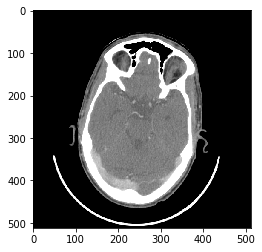

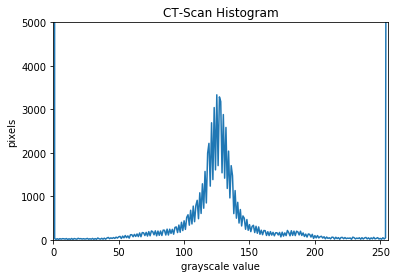

In [6]:
img, histogram = read_image_and_histogram(filepath)
plot_image(img)
plot_histogram(histogram)

# Image Processing

In [7]:
# Remove skull/ventricle pixels (TODO: Optimize this)
img[np.where((img >= [255,255,255]).all(axis = 2))] = [0,0,0]
img[np.where((img <= [100,100,100]).all(axis = 2))] = [0,0,0]
# Apply Median filter
img = ndimage.median_filter(img, 10)

In [8]:
# Remove soft tissues
# (thresh, img_bw) = cv2.threshold(img_bw, 100, 255, 0)
# img, mask = find_biggest_contour(img_bw)

In [9]:
# Write Processed Image (TODO: use this on memory)
processed_filepath = directory + 'processed-' + filename
cv2.imwrite(processed_filepath, img)

True

# Plot After Image Processing

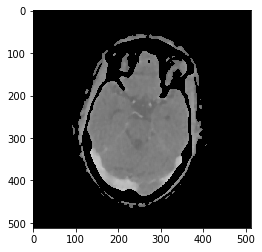

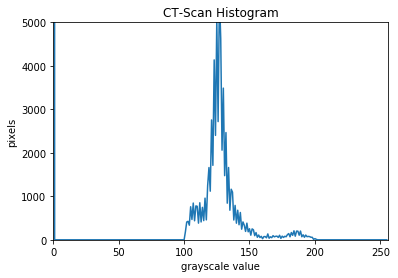

In [10]:
pr_img, pr_histogram = read_image_and_histogram(processed_filepath)
plot_image(pr_img)
plot_histogram(pr_histogram)